<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Project Title</h3> </center>
<center><h4>Glenn Billman, Shreya Yalamanchili, Sam Zlota</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

This project is focused on determining a song's popularity based on features of the song. In this project, we sought to compare several supervised machine learning algorithms to determine the popularity of a given song. Our project is intended to provide insights on the competitive music industry and can help artists know what kind of music to release. 

Our project is based on data collected from the Spotify API, and includes 14 features and one target variable (song popularity). This project also includes a hypothesis test to determine if songs released within the past 90 days are more popular than songs released before the past 90 days.

To obtain results, this project applies four machine learning algorithms to the features and attempts to predict the correct popularity score for each song. The performance of each model is synthesized in three metrics: the r-squared value, mean-squared error, and mean accuracy. Through this project, we evaluated different regression algorithms on their ability to predict song popularity. We also determined the types of features that were better in predicting song popularity through tuning the model.


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>
5. <a href='#5'>CONTRIBUTIONS</a>
6. <a href='#6'>REFERENCES</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

Knowing what kind of music to release can be difficult for artists and producers, so this project can help users explore how popular a given song would be today. Artists would then know what type of music is the most popular, and can release songs accordingly. More specifically, our project is focused on predicting a song’s popularity based on features of the track. In this project, we sought to compare several supervised machine learning algorithms to determine the popularity of a given song. Through our analysis, we would like to learn more about what factors are important in determining how popular a song is, what types of songs are more popular, and why certain songs are more popular than others. 

It is important to tackle this problem because it increases efficiency in the music industry. Knowing what kind of music will be popular today makes it much easier for artists and producers to cater new music to these results. In the end, consumers are satisfied because they receive music they enjoy, and artists are satisfied because they realize increased profits. 

Insights from this project can also be useful in other ways. Seeing which of our features most affects popularity can tell artists and producers what to focus on in their music. Furthermore, looking at metrics such as when the song was released and how popular the artist(s) on the song are can provide additional insight on how features related to the song (but not part of the actual music) affect its popularity. 

This problem has also had previous research done on it. "Predicting Song Popularity" was a  project done by three Stanford students who sought to try and predict a song's popularity based on its features and determine which features were most important in determining popularity.<sup>1</sup> This project used data from the Million Song Dataset, a collection of features and metadata on one million songs. Many of their features, such as  duration, key, energy, and danceability, were also part of our dataset. Unlike our project, however, this one used both classification adn regression algorithms. More specifically, logistic  regression, linear discriminant analysis, quardatic discriminant analysis, SVM, multilayer perceptron, and multiple linear regression were used. In terms of performance, SVM performed the best. However, there were no significant differences in the performance of all the algorithms; their F1 scores ranged
between 0.5 and 0.6 and mean accuracies ranged between 0.75 and 0.80.

Given the aforementioned problem and its importance, we set out to tackle the following questions:
* What features are important in determining popularity for a given song? Which features have comparatively little impact on determining popularity?
* Why are certain songs more popular than others?
* What types (genre, region, artist, etc.) of songs are the most popular? What types are least popular?
* Which ML algorithm is most accurate in predicting song popularity?
* How does the average popularity for a given group (genre, artist, release date) change over time?

Based on these questions, we have formulated a list of hypotheses:
* Songs that are released within the past 90 days will be categorized as popular.
* Songs that have an artist popularity above 85 will be categorized as popular.
* Songs that are from the pop genre will be categorized as popular. 
* Songs that are released closer to today will be more popular than songs that were released further in the past.
* Songs that have a medium-high value for “energy” will be more popular than other songs.
* Songs that have a high value for “danceability” will be more popular than other songs.
* Songs that have a higher artist popularity will be more popular than other songs.


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

We retrieved our data for this project from Spotify’s API.<sup>2</sup> To pull 10,000 random songs, we used the search feature of the Spotify API and a text file of the 20,000 most common English words. A word was searched for, and then an offset number between 0 and 200 was chosen to select a song from those results. Some obscure words did not yield results, in which case the loop would start over again with a new word. 

Once we had a dataframe of 10,000 songs, we needed to access the song’s traits. Using the song id, which was included in our original dataframe, we could access the track's endpoint, which contained most of the information about the song, such as length, tempo, etc. The artist and album information were also stored in a dataframe. From the artist and album json blobs, the artist and album ids were retrieved. To access artist popularity, we used the artist id to access the artist endpoints. The release date was accessed via the album endpoint. 

The raw data set had 10,000 rows with 18 columns. This included general information about a song such as track, artist, id, release date and search term, as well as the song’s qualities, which Spotify determined. There are danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, popularity and artist popularity. 

Below is the raw data set imported from our online GitHub repository. Please see the attached notebook to view our code on retriving the data from the Spotify API.

In [2]:
import pandas as pd # imports the relevant library

# reads the data into a dataframe
url = 'https://raw.githubusercontent.com/sam-zlota/DS3000-Final-Project/master/data/fp_dataset.csv'
all_data = pd.read_csv(url, index_col=0)
all_data

,track,artist,id,search term,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
0,My Cousin Harris,Aziz Ansari,0ojSU3QoovuJxwVYk34opc,intimate,0.657,0.6220,3.0,-7.026,1.0,0.9440,0.8040,0.00000,0.9170,0.3950,66.521,96053.0,35,2010-01-18,[49]
1,"Before She Does - Live At Target Center, Minne...",Eric Church,42ToYHW2koZnAqgDoEQ314,minneapolis,0.504,0.7770,0.0,-8.583,1.0,0.0370,0.0648,0.00001,0.8030,0.3560,104.023,209277.0,27,2019-05-24,[77]
2,Muerto en Choroni,Selected Music,1nfbOAPwnMRBlE0rUNGg43,selected,0.726,0.9150,4.0,-5.407,0.0,0.2300,0.0351,0.00000,0.2830,0.8370,127.994,246826.0,20,2020-08-28,"[30, 26, 53, 57]"
3,Unwind in the Tropics,Relaxmycat,4iuthceAzx9jJt5o08HwMb,resting,0.204,0.0423,6.0,-26.704,1.0,0.0517,0.9930,0.82700,0.1120,0.0345,89.789,112000.0,0,2020-11-18,"[53, 27, 33]"
4,Waiver,Reki,7l1B4m3ujaWim9n3zMMhwa,waive,0.419,0.6690,0.0,-8.137,0.0,0.0377,0.5070,0.34800,0.1150,0.0382,94.837,252682.0,4,2012-06-15,[25]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10145,Shining Clothing,El Vergaras,43LE7GvHXTFE8aUKX3qZr6,clothing,0.268,0.1170,0.0,-15.616,1.0,0.0367,0.2440,0.08250,0.1520,0.0400,139.678,207479.0,26,2017-08-01,[29]
10146,Woodlands,BITWVLF,7oPl7r8kLdjpeXlWg7LDc1,woodlands,0.655,0.6660,3.0,-9.673,0.0,0.0345,0.0494,0.91100,0.0959,0.1900,129.995,176135.0,12,2018-04-25,[25]
10147,Jumpin' Jack Flash,Los Colognes,04rMosX7Wp0gVhUPcJEPQr,cologne,0.554,0.7530,0.0,-7.088,1.0,0.0334,0.5090,0.00137,0.1950,0.5960,126.818,255987.0,30,2016-02-17,[28]
10148,Grades Scrubstone,Atomic Convinced,0MtUy6AgMuIVmteyZtehrz,convince,0.198,0.0282,0.0,-23.294,0.0,0.0384,0.9950,0.93300,0.1030,0.0390,86.697,102008.0,14,2020-10-11,[23]


### 2.2. Data Analysis
The hypothesis our project will test is that songs that are released within the past 90 days will be categorized as popular. For this hypothesis, the independent variable is the song’s days since release and the dependent variable is the popularity index. 

Our predictive model is based on 14 features, which produces one target variable. The outcome variable we are going to predict is a popularity index, which Spotify calculates as an integer between 1-100, with 0 being the least popular and 100 being the most popular. This number is based on the total number of plays and how recent they were. The features are danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration, days since release and artist popularity. These are important predictors for popularity, because they are all unique features of the song and the environment around the song (artist/release date). How a song sounds greatly influences how popular it is, and our features break down and quantify this. Furthermore, the artist and release data can help explain some of the variability in the popularity regression. 

This model is a supervised machine learning problem, and the sub-category of the learning task is multiple regression. Our dataset includes a set of feature variables and one outcome variable. These variables can be used for a supervised machine learning task, because we can map our feature variables to our outcome variable to determine the popularity of a given song. The songs can be classified into a given popularity number based on their features. Therefore, if we provided a brand new song to the tool, it would be able to predict how popular the song would be. 

We will be using the following ML algorithms: multiple linear regresion, Ridge regression, kNN, amd SVM.  We chose Ridge regression because it reduces the complexity of the model and we would like to see if it performs better than the other algorithms. kNN was also chosen to be applied to the model since it performs well on datasets like the above -- non-sparse datasets with relatively few (less than a hundred) features. Finally, SVM was chosen since it scales well to large datasets and  yields faster predictions. We will apply all of these algorithms to our dataset and compare how accurate they are. By doing this, we can see which algorithm performs the best and is most appropriate for our model. 

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling

First, we import our raw data from the github repo so we can acccess and transform it (see above).

Sometimes different search terms would call up the same song. For example, "detective" and "watching" both returned Elvis's song "Watching The Detectives." The 37 songs added twice need to be dropped. 

In [307]:
all_data.drop_duplicates(subset=['id'], inplace=True) # drops the duplicat songs
all_data.reset_index(drop=True, inplace=True) # resets the indices
all_data

,track,artist,id,search term,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
0,My Cousin Harris,Aziz Ansari,0ojSU3QoovuJxwVYk34opc,intimate,0.657,0.6220,3.0,-7.026,1.0,0.9440,0.8040,0.00000,0.9170,0.3950,66.521,96053.0,35,2010-01-18,[49]
1,"Before She Does - Live At Target Center, Minne...",Eric Church,42ToYHW2koZnAqgDoEQ314,minneapolis,0.504,0.7770,0.0,-8.583,1.0,0.0370,0.0648,0.00001,0.8030,0.3560,104.023,209277.0,27,2019-05-24,[77]
2,Muerto en Choroni,Selected Music,1nfbOAPwnMRBlE0rUNGg43,selected,0.726,0.9150,4.0,-5.407,0.0,0.2300,0.0351,0.00000,0.2830,0.8370,127.994,246826.0,20,2020-08-28,"[30, 26, 53, 57]"
3,Unwind in the Tropics,Relaxmycat,4iuthceAzx9jJt5o08HwMb,resting,0.204,0.0423,6.0,-26.704,1.0,0.0517,0.9930,0.82700,0.1120,0.0345,89.789,112000.0,0,2020-11-18,"[53, 27, 33]"
4,Waiver,Reki,7l1B4m3ujaWim9n3zMMhwa,waive,0.419,0.6690,0.0,-8.137,0.0,0.0377,0.5070,0.34800,0.1150,0.0382,94.837,252682.0,4,2012-06-15,[25]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9958,Shining Clothing,El Vergaras,43LE7GvHXTFE8aUKX3qZr6,clothing,0.268,0.1170,0.0,-15.616,1.0,0.0367,0.2440,0.08250,0.1520,0.0400,139.678,207479.0,26,2017-08-01,[29]
9959,Woodlands,BITWVLF,7oPl7r8kLdjpeXlWg7LDc1,woodlands,0.655,0.6660,3.0,-9.673,0.0,0.0345,0.0494,0.91100,0.0959,0.1900,129.995,176135.0,12,2018-04-25,[25]
9960,Jumpin' Jack Flash,Los Colognes,04rMosX7Wp0gVhUPcJEPQr,cologne,0.554,0.7530,0.0,-7.088,1.0,0.0334,0.5090,0.00137,0.1950,0.5960,126.818,255987.0,30,2016-02-17,[28]
9961,Grades Scrubstone,Atomic Convinced,0MtUy6AgMuIVmteyZtehrz,convince,0.198,0.0282,0.0,-23.294,0.0,0.0384,0.9950,0.93300,0.1030,0.0390,86.697,102008.0,14,2020-10-11,[23]


Many songs feature multiple artists. The popularity scores for all artists on a track are saved in the dataframe as a list but need to be transformed into one value. In this case, we will average the popularity of all artissts on one track. Some artists did not have a popularity score from the API, so they will automatically be set to NaN. 

In [308]:
all_data['artist popularity'].head() # displays some of the artist popularity values

0                [49]
1                [77]
2    [30, 26, 53, 57]
3        [53, 27, 33]
4                [25]
Name: artist popularity, dtype: object

In [309]:
# imports the relevant methods/libaries
from statistics import mean
import numpy as np

# transforms each list of artist popularities to one value by taking the average of each artist's popularity 
def average_pop(artist_pop): 
    
    # the list of artist popularity scores is stored as a string and needs to be transformed
    # replaces the brackets in the string with blank spaces
    artist_pop= artist_pop.replace('[','')
    artist_pop= artist_pop.replace(']','')
    artist_pop= artist_pop.replace(',','')
    pop_list = artist_pop.split() # splits all the popularity values into a list
    num_list = [int(val) for val in pop_list]  # transforms each value to an int
    
    # returns the mean of the list if there are values, else replaces it with NaN
    if len(num_list) > 0: 
        return mean(num_list)
    else: 
        return np.nan

The function can now be applied to the raw data. As shown below, all of the artist popularity lists have been transformed to an integer representing the average of all the values.

In [310]:
# applies the average function to the raw data 
all_data['artist popularity']= all_data['artist popularity'].apply(average_pop)

all_data['artist popularity'].head()

0    49.000000
1    77.000000
2    41.500000
3    37.666667
4    25.000000
Name: artist popularity, dtype: float64

Next we will transform release date into days since release. We will use Nov. 23 2020 as "today's" date because that is when the API was accessed. There are some songs that have only a year or a year and month as their release date. To fix this, we will use July 2 as the default month and year (the middle of the year) for songs with only a year and the 15th as the default day for songs with a year/month date. 

In [311]:
# returns rows that only have a year or year and month for release date
all_data[(all_data['release date']=='1996') | (all_data['release date']=='1966-07')]

,track,artist,id,search term,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
1852,I Can Love Again,Commissioned,0FVjcZ2oU7rhkiKrfbifZl,commissioned,0.589,0.546,5.0,-11.588,0.0,0.0431,0.155000,0.000239,0.193,0.602,89.983,310533.0,13,1996,42.0
1867,I've Got A Crush On You - Live At The Sands Ho...,Frank Sinatra,6JXS5YZiLiMpxddZmL0M5Y,sands,0.472,0.265,5.0,-17.581,1.0,0.4700,0.700000,0.000000,0.958,0.470,67.667,162893.0,32,1966-07,84.0
2076,Borrowed Time,GG Allin,3NnVpg7qTJLNeuHMOCooND,borrowed,0.378,0.510,4.0,-7.980,1.0,0.0396,0.856000,0.000919,0.235,0.235,79.343,250960.0,14,1996,44.0
6202,Everybody (Backstreet's Back) - Extended Version,Backstreet Boys,5WTxbyWTpoqhdxEN2szOnl,everybody,0.792,0.811,10.0,-5.198,0.0,0.0367,0.006020,0.000155,0.224,0.509,108.054,287293.0,59,1996,80.0
6808,Reno,Spymob,3f2CxKW6noztitsDZul7v7,townhouse,0.297,0.862,0.0,-5.586,1.0,0.0599,0.144000,0.000033,0.104,0.451,170.894,297133.0,0,1996,12.0
7136,Sink to the Bottom,Fountains Of Wayne,32uXfxJERzv4RK1gMLXbOA,bottom,0.471,0.710,4.0,-6.418,1.0,0.0286,0.014200,0.000036,0.283,0.809,97.430,192493.0,46,1996,63.0
7646,Pitiful,Failure,24ygYcg7PBCcCoOV7xp6LG,failure,0.513,0.854,8.0,-7.780,0.0,0.0329,0.000276,0.735000,0.403,0.829,133.908,285533.0,27,1996,48.0
7934,Scenic Pastures,Archers Of Loaf,0LXgmvYxGxYQGYASZDaQue,pasture,0.639,0.843,9.0,-8.222,1.0,0.0322,0.013000,0.763000,0.109,0.642,125.155,200960.0,18,1996,41.0
8962,Title Theme (Madame Und Ihre Nichten),Gert Wilden & Orchestra,3YUmwZwmixbJkGf55kmSDl,nicht,0.312,0.385,0.0,-7.924,1.0,0.0303,0.710000,0.862000,0.374,0.124,132.185,156240.0,23,1996,19.0


In [312]:
# imports the relevant method
from datetime import date

# returns the  days sincea given date 
def days_since(d):
    today = date(2020, 11, 23) # sets todays date as 11/23/2020
    
    # if a date has the year, month, and day, split the values and subtract that date from today
    if len(d)==10:
        year = int(d[:4])
        month = int(d[5:7])
        day = int(d[8:10])
        release = date(year, month, day)
        diff = today - release
        
        return(diff.days)
    
    # else if a date only has the year, set the month/day equal to July 2nd and subtract that date from today
    elif len(d)==4:
        year = int(d[:4])
        release = date(year, 7, 2)
        diff = today - release
        
        return(diff.days)
    
    # else if a date only has the year and month, set the day equal to the 15th and subtract that date from today
    else:
        year = int(d[:4])
        month = int(d[5:7])
        release = date(year, month, 15)
        diff = today - release
        
        return(float(diff.days))

The function can now be applied to the raw data. As shown below, all of the release dates have been transformed to an integer representing the days since release.

In [313]:
# apply the date function to the data
all_data['release date']= all_data['release date'].apply(days_since)

all_data['release date'].head()

0    3962.0
1     549.0
2      87.0
3       5.0
4    3083.0
Name: release date, dtype: float64

Now we need to drop the NaN values from artist popularity. We need to drop the NaN values, because they will not be useful for our model since there is no value. This also provides more consistency to our data.

In [314]:
all_data.dropna(inplace=True) # drops all the NaN values
all_data.reset_index(drop=True, inplace=True) # resets the indices
all_data

,track,artist,id,search term,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
0,My Cousin Harris,Aziz Ansari,0ojSU3QoovuJxwVYk34opc,intimate,0.657,0.6220,3.0,-7.026,1.0,0.9440,0.8040,0.00000,0.9170,0.3950,66.521,96053.0,35,3962.0,49.000000
1,"Before She Does - Live At Target Center, Minne...",Eric Church,42ToYHW2koZnAqgDoEQ314,minneapolis,0.504,0.7770,0.0,-8.583,1.0,0.0370,0.0648,0.00001,0.8030,0.3560,104.023,209277.0,27,549.0,77.000000
2,Muerto en Choroni,Selected Music,1nfbOAPwnMRBlE0rUNGg43,selected,0.726,0.9150,4.0,-5.407,0.0,0.2300,0.0351,0.00000,0.2830,0.8370,127.994,246826.0,20,87.0,41.500000
3,Unwind in the Tropics,Relaxmycat,4iuthceAzx9jJt5o08HwMb,resting,0.204,0.0423,6.0,-26.704,1.0,0.0517,0.9930,0.82700,0.1120,0.0345,89.789,112000.0,0,5.0,37.666667
4,Waiver,Reki,7l1B4m3ujaWim9n3zMMhwa,waive,0.419,0.6690,0.0,-8.137,0.0,0.0377,0.5070,0.34800,0.1150,0.0382,94.837,252682.0,4,3083.0,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9913,Shining Clothing,El Vergaras,43LE7GvHXTFE8aUKX3qZr6,clothing,0.268,0.1170,0.0,-15.616,1.0,0.0367,0.2440,0.08250,0.1520,0.0400,139.678,207479.0,26,1210.0,29.000000
9914,Woodlands,BITWVLF,7oPl7r8kLdjpeXlWg7LDc1,woodlands,0.655,0.6660,3.0,-9.673,0.0,0.0345,0.0494,0.91100,0.0959,0.1900,129.995,176135.0,12,943.0,25.000000
9915,Jumpin' Jack Flash,Los Colognes,04rMosX7Wp0gVhUPcJEPQr,cologne,0.554,0.7530,0.0,-7.088,1.0,0.0334,0.5090,0.00137,0.1950,0.5960,126.818,255987.0,30,1741.0,28.000000
9916,Grades Scrubstone,Atomic Convinced,0MtUy6AgMuIVmteyZtehrz,convince,0.198,0.0282,0.0,-23.294,0.0,0.0384,0.9950,0.93300,0.1030,0.0390,86.697,102008.0,14,43.0,23.000000


We will devide the data frame into a target and feature dataframe, as well as drop the general information columns. Dividing the data into target and features will allow us to apply our model tot he  data 

In [315]:
# returns the features and target of the data
def features_and_target(df):
    features = df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness',
                   'liveness','valence','tempo','duration_ms','release date','artist popularity']]
    target = df['popularity']/100
    #scaling popularity from 0-100 to 0-1
    return features, target

features, target = features_and_target(all_data)

We will conduct model-based feature selection after running the model so that we can compare the r-squared statistics. Please see section 3.5 for model-based feature selection. 

## Exploring Distributions to Determine how to Scale/Transform Data

In [316]:
feature_cols = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness',
                   'liveness','valence','tempo','duration_ms','release date','artist popularity']

all_data_transformed = all_data.copy()
all_data_transformed.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
count,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9.918000e+03,9918.000000,9918.000000,9918.000000
mean,0.554291,0.546703,5.231297,-11.292737,0.640048,0.123451,0.364930,0.300840,0.201356,0.433191,118.602966,2.237906e+05,21.677052,2495.600625,38.584863
std,0.198697,0.279402,3.595839,7.027913,0.480010,0.176011,0.361240,0.393078,0.178794,0.265690,31.651273,1.663401e+05,20.466483,3626.389865,25.650914
min,0.000000,0.000000,0.000000,-56.595000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.963000e+03,0.000000,-5.000000,0.000000
25%,0.425000,0.326000,2.000000,-14.630750,0.000000,0.037800,0.021825,0.000000,0.098000,0.210000,95.022750,1.548460e+05,2.000000,233.250000,17.000000
50%,0.577000,0.573000,5.000000,-9.223500,1.000000,0.052900,0.228000,0.002860,0.125000,0.416000,119.977000,2.033630e+05,18.000000,1074.500000,40.000000
75%,0.705000,0.780000,8.000000,-6.212500,1.000000,0.115000,0.719000,0.793000,0.247000,0.640000,139.470000,2.574720e+05,37.000000,3249.000000,58.500000
max,0.993000,1.000000,11.000000,2.182000,1.000000,0.966000,0.996000,1.000000,0.992000,0.987000,227.113000,5.983722e+06,96.000000,27173.000000,100.000000


### Visualizing Distributions Before Transformations

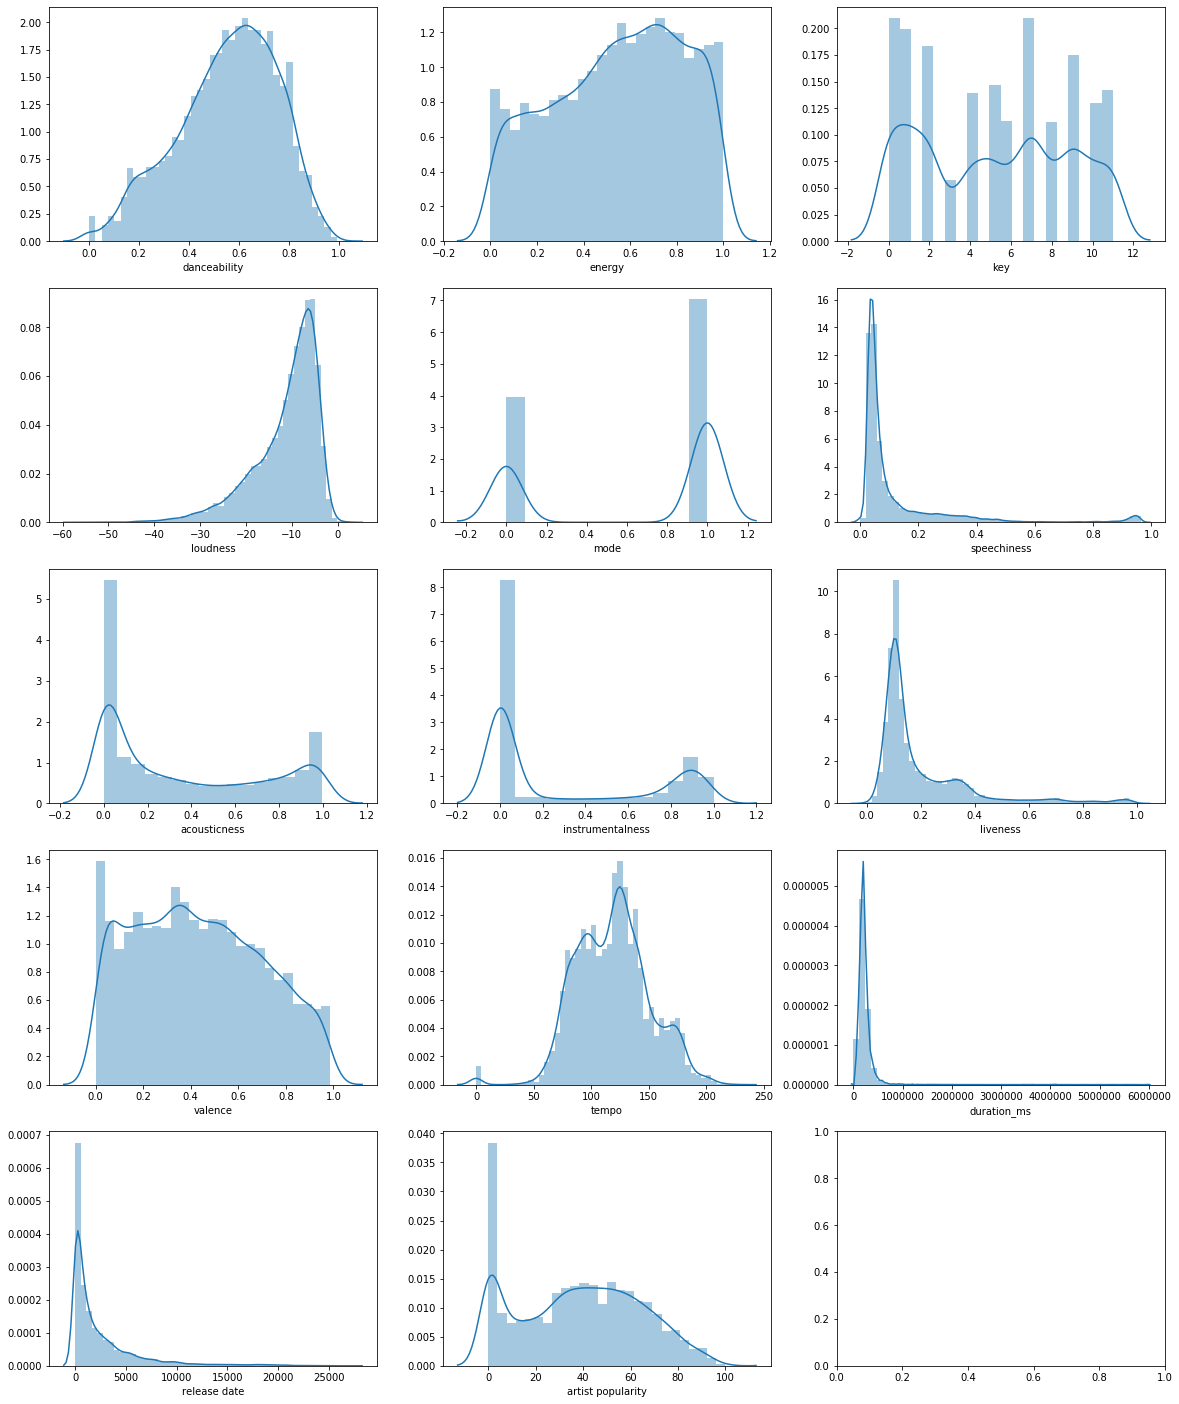

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(5, 3, figsize=(20, 25))

for i in range(len(feature_cols)):
    sns.distplot(all_data[feature_cols[i]], ax=axs.flat[i])

### Using log to transform long tail distributions

In [318]:
import numpy as np

#the features with long tail distributions
long_tailsA = ["duration_ms", "release date","speechiness", "acousticness", "liveness"]

#applying log to all values in long tail distributions to standardize the distribution
#we take log(x+1) to preserve values of 0 that would otherwise go to 0 upon log transformation
for long_tail in long_tailsA:
    all_data_transformed[long_tail] = np.log(all_data_transformed[long_tail] + 1)
    
#loudness handled seperately because of negative values    
all_data_transformed["loudness"] = np.log(all_data_transformed["loudness"] + 100)
#some values need to be removed 
all_data_transformed.replace([float("inf"), float("-inf")], np.nan, inplace=True)
all_data_transformed.dropna(inplace=True)




/Users/szlota777/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/szlota777/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### Dropping Outliers

In [319]:
#we determined that values between 5th and 95th percentile yielded optimal results
for feature in feature_cols:
    x =  all_data_transformed[feature]
    x = x[x.between(x.quantile(0.05), x.quantile(.95))] # without outliers
    all_data_transformed[feature] = x
all_data_transformed.dropna(inplace=True)

### Scaling Data

In [320]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#scaling features
features_transformed = scaler.fit_transform(all_data_transformed[feature_cols])
features_transformed = pd.DataFrame(features_transformed, columns=feature_cols)
features = features_transformed

#scaling target 
#target already on 0-100 scale, so we divide by 100
target = all_data_transformed['popularity'] / 100
target.reset_index(drop=True, inplace=True)

## 3.2. Data Exploration After Transformations


In [321]:
features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release date,artist popularity
count,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000
mean,0.622990,0.573945,0.478600,0.740349,0.613098,0.171388,0.363507,0.263782,0.217437,0.468443,0.455433,0.584162,0.626595,0.448298
std,0.228949,0.250013,0.323103,0.201125,0.487105,0.235967,0.339644,0.386092,0.203042,0.261956,0.253259,0.195704,0.230498,0.301505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.465649,0.391011,0.181818,0.644353,0.000000,0.023090,0.038102,0.000000,0.079164,0.257362,0.241054,0.466288,0.470550,0.175000
50%,0.645802,0.596792,0.454545,0.794263,1.000000,0.062575,0.261846,0.000761,0.127845,0.450588,0.459474,0.598258,0.658393,0.462500
75%,0.810687,0.773892,0.727273,0.890967,1.000000,0.199425,0.674184,0.648936,0.303382,0.668257,0.654433,0.713901,0.810569,0.700000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Distribution Plots

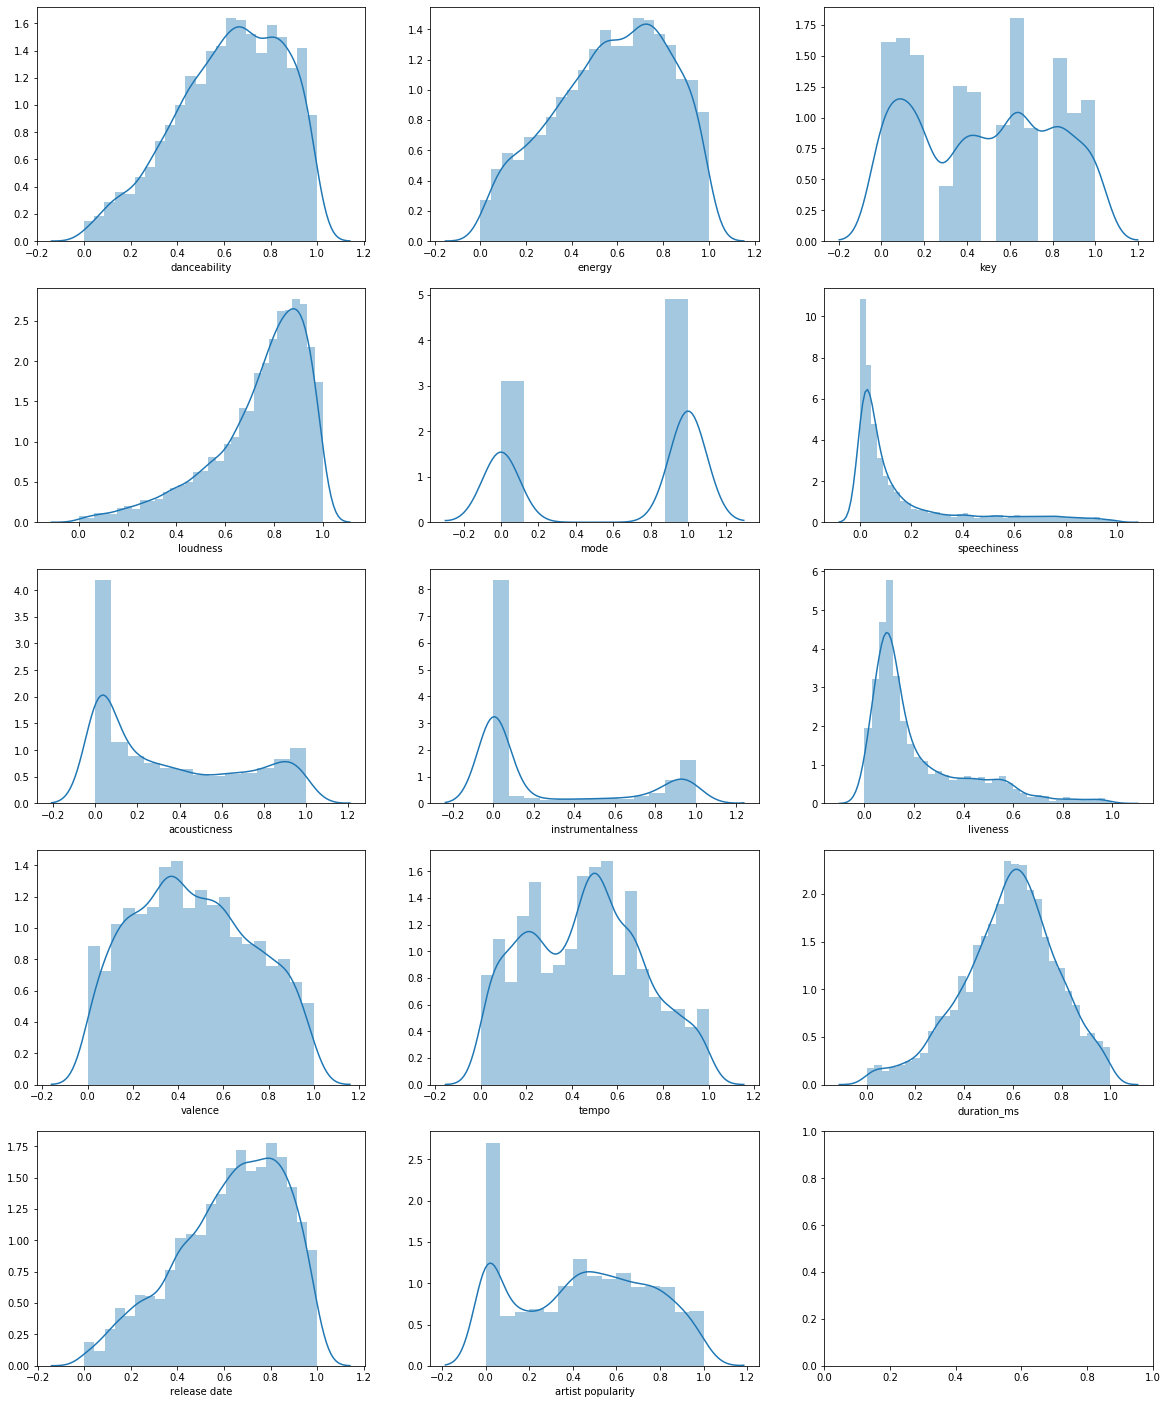

In [322]:
fig, axs = plt.subplots(5, 3, figsize=(20, 25))

for i in range(len(feature_cols)):
    sns.distplot(features[feature_cols[i]], ax=axs.flat[i])

### Box Plots

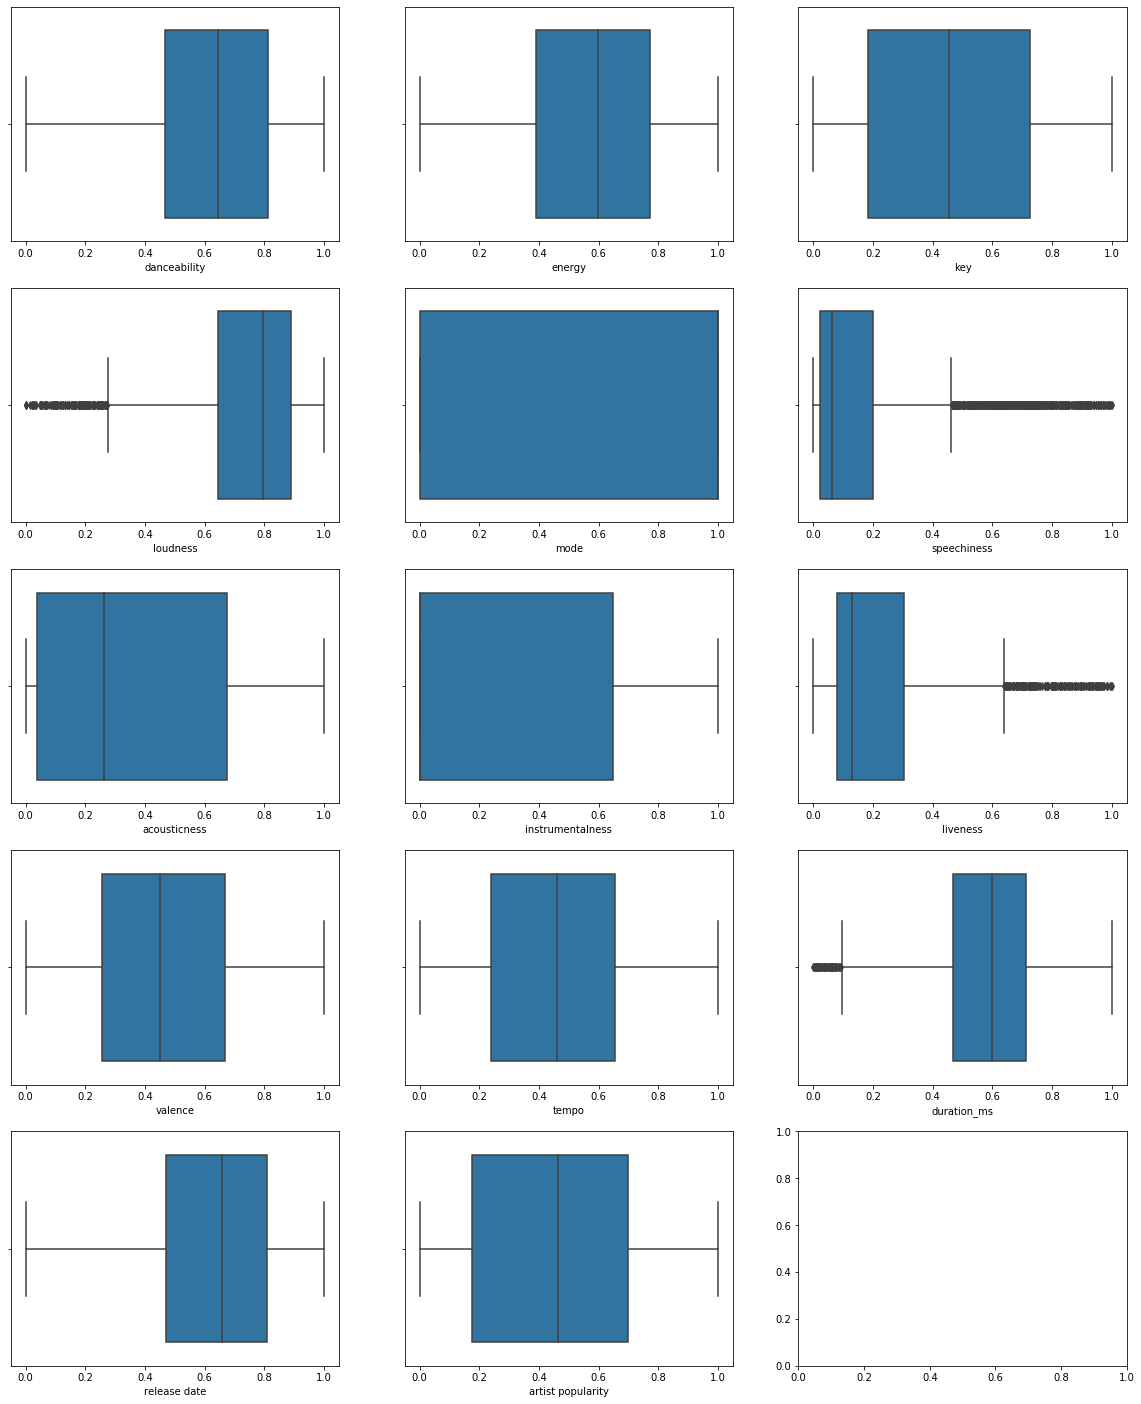

In [323]:
fig, axs = plt.subplots(5, 3, figsize=(20, 25))

for i in range(len(feature_cols)):
    sns.boxplot(features[feature_cols[i]], ax=axs.flat[i])

## More Data Exploration: Correlations

#### Heatmap for Correlations Across Feature Variables

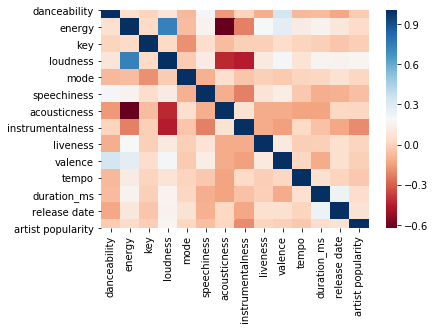

In [324]:
sns.heatmap(features.corr(), cmap ="RdBu")

#### Visualizing Features vs. Target Correlation

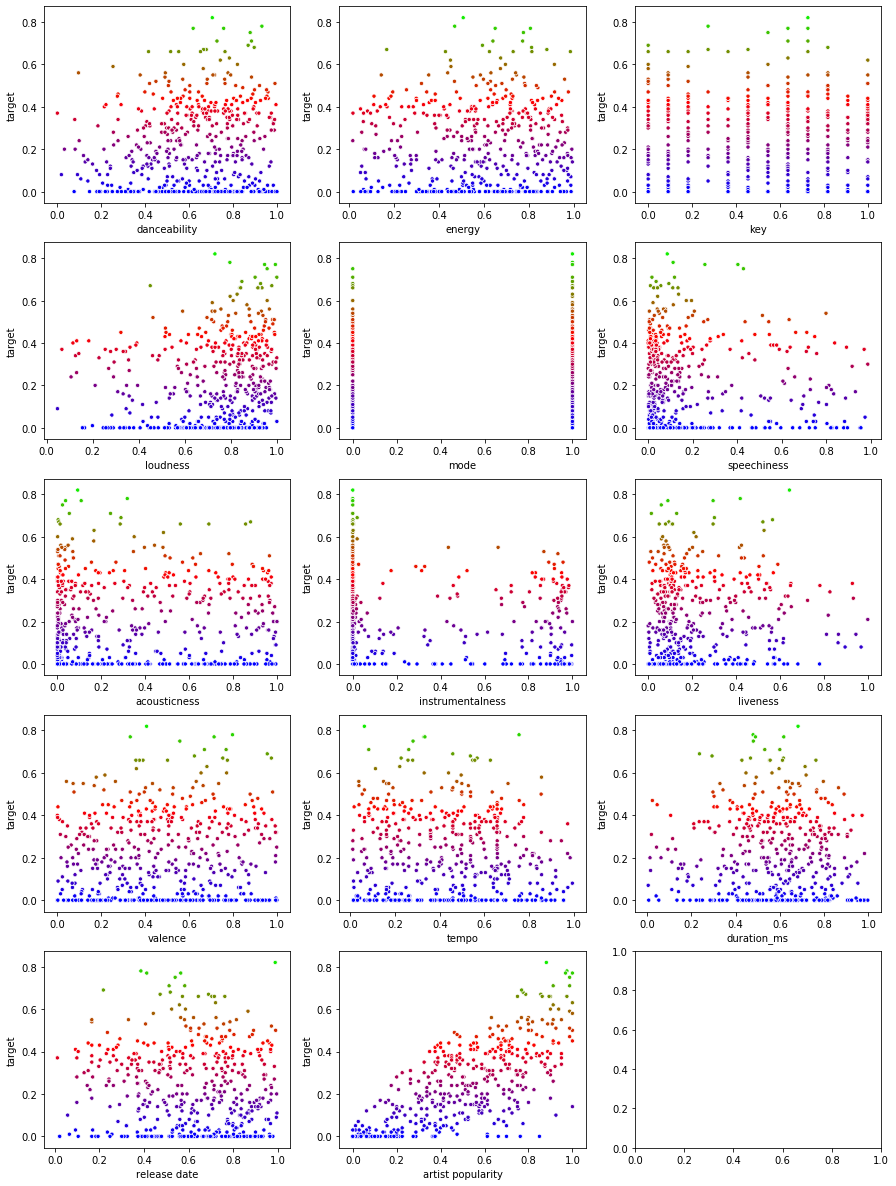

In [325]:
all_data_copy = features.copy()

all_data_copy["target"] = target

#sampling 500 data points
all_data_samp = all_data_copy.sample(500)
fig, axs = plt.subplots(5,3 , figsize=(15, 21))

for i in range(len(feature_cols)):
    sns.scatterplot(all_data_samp[feature_cols[i]], all_data_samp["target"], 
                   hue = all_data_copy["target"], 
                    size = 10, 
                    legend=False, 
                    palette="brg",
                    ax=axs.flat[i])

### 3.3. Model Construction

####  Constructing  and Applying  the Model

First, we need to split the data into training and testing sets. This will allow us to train our model with the training set, and then test it with the testing set after tuning some of the parameters.

In [326]:
from sklearn.model_selection import train_test_split # imports the relevant method

features.dropna(inplace=True)

def split_the_dataset(features, target):
    # splits the data into training and testing sets
    return train_test_split(features, target, random_state=3000)

X_train, X_test, y_train, y_test = split_the_dataset(features, target)

Since we  will be testing 4 machine learning algorithms, we can define a dictionary with the regression estimators so we can apply them in an iteration statement.

In [327]:
# imports the relevant methods
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

# creates an estimators dictionary with the regression names and objects
estimators = {"Linear Regression": LinearRegression(), 
              "Ridge": Ridge(),
              "k-Nearest Neighbor": KNeighborsRegressor(),
              "Support Vector Machine": LinearSVR(max_iter = 100000)}

We are now ready to apply our algorithms. We can apply the algorithms through an iteration statement, shown below.

In [328]:
# applies the models to the training data
def apply_models():
    estimator_model = dict() # creates a dictionary to store the models
    
    for estimator_name, estimator_object in estimators.items(): # for each estimator in the estimators dictionary
        model = estimator_object.fit(X=X_train, y=y_train) # fit the training data to the model
        estimator_model[estimator_name] = model # add the model to the dictionary
        
    return estimator_model

In [329]:
estimator_model = apply_models() 

#### Conducting Hypothesis Testing

Now, we can pivot to our hypothesis testing. The hypothesis our project will test is that songs that are released within the past 90 days will have a higher popularity value than songs released before the past 90 days. For this hypothesis, the independent variable is the song’s days since release and the dependent variable is the popularity index. 

The null hypothesis is that songs released within the past 90 days will lead to a popularity value similar to songs that were not released within the past 90 days.

To test this hypothesis, we first need to retrieve the relevant data. In this case, we need the release date and popularity score, which we can get from the raw data.

In [330]:
release_date = all_data['release date'] # gets all the release dates from the clean data
pop = all_data['popularity'] # getts all the popularity scores from the clean data

data = pd.merge(release_date, pop, left_index = True, right_index = True) # merges the two columns into one dataframe

In [331]:
data.head()

,release date,popularity
0,3962.0,35
1,549.0,27
2,87.0,20
3,5.0,0
4,3083.0,4


Now, we can manipulate the release date column to group it our binary independent variable - songs released within 90 days vs songs released before 90 days. We can do this by writing a function to transform the values and applying this function to the dataframe.

In [332]:
# determines if a song was released within 90 days or not
def within_90_days(days):
    if (days <= 90):  # if days are less than or equal to  90, it is within 90 days
        return "Within 90 days"
    else: # else it is before 90 days
        return "Before 90 days"

After mapping the function to the release date column, it has been transformed to match the independent variable.

In [333]:
data['release date'] = data['release date'].map(within_90_days) # maps the function to the release date column
data.head()

,release date,popularity
0,Before 90 days,35
1,Before 90 days,27
2,Within 90 days,20
3,Within 90 days,0
4,Before 90 days,4


We can now produce the descriptive stats (count, mean, std, and sem) for the data. This function will be useful in conducting the one-way ANOVA test, and also provides some useful statistics on the data.

In [334]:
# groups the data by the IV and aggregates by the count, mean, std, and sem
def describe_data(data, IV, DV):
    # resulting dataframe produces an aggregation for each DV, so only include the given DV column
    return data.groupby(IV).agg(["count", "mean", "std", "sem"])[DV] 

In [335]:
descriptives = describe_data(data, 'release date', 'popularity')
descriptives

,count,mean,std,sem
release date,,,,
Before 90 days,8430,21.891815,20.636811,0.224765
Within 90 days,1488,20.460349,19.435297,0.503837


We can now conduct our hypothesis test using a one-way ANOVA. The below function takes a dataframe and the names of the IV and DV and conducts a one-way ANOVA on the dataframe. It calculates the F-test values, checks for assumptions, and performs post-hoc comparisons. The function does not assume anything about the data except that there are 2 independent variables (in this case, before and within 90 days of release).

In [336]:
# imports the relevant methods/libaries
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def oneway_ANOVA(data, IV, DV):
    # creates a dataframe with the descriptives of the data set to get the different IV level names
    descriptives = describe_data(data, IV, DV)
    
    # gets the names of the 2 different IV levels
    lv1 = descriptives.index[0]
    lv2 = descriptives.index[1]
    
    # gets the values within the data which correspond to each IV level
    lv1_data = data[data[IV] == lv1][DV]
    lv2_data = data[data[IV] == lv2][DV]
    
    # calculates the two degrees of freedom    
    df1 = len(descriptives) - 1
    df2 = (len(lv1_data) - 1) + (len(lv2_data) - 1)
    
    # runs the f-test with the 2 levels
    f_test = stats.f_oneway(lv1_data, lv2_data)
    
    # gets the f statistic and p-value and rounds them accordingly
    f = round(f_test[0], 2)
    p = round(f_test[1], 4)
    
    # gets the Levene Results to check for equality of variances
    levene_results = stats.levene(lv1_data, lv2_data)

    # checks to see if the assumption is met and sets the message to a variable
    assumption_msg = met_assumption(levene_results[1], 0.05)
        
    # gets the Shapiro Results to check for normality
    shapiro_lv1 = stats.shapiro(lv1_data)
    shapiro_lv2 = stats.shapiro(lv2_data)
    
    # checps to see if the assumption is met and sets the message to a variable
    assumption1_msg = met_assumption(shapiro_lv1[1], 0.05)
    assumption2_msg = met_assumption(shapiro_lv2[1], 0.05)
    
    # gets the Post-hoc test results
    mc = MultiComparison(data[DV], data[IV])
    tukey_result = mc.tukeyhsd()

    # prints the analysis with proper formatting
    return print("-----------------------\nONE-WAY ANOVA RESULTS\n-----------------------\n\n\nF-test\n-----------------------\nF("
                 + str(df1) +"," + str(df2) + ") =", str(f) + ", p =", str(p) 
                 + "\n\n\n\nAssumption Checks\n-----------------------\n\nAssumption of Equality of Variances:\n\t" 
                 + str(levene_results) + "\n\t" + assumption_msg + "\n\nAssumption of Normality:\n\t" 
                 + lv1, ":", str(shapiro_lv1) + "\n\t" + assumption1_msg + "\n\n\t" 
                 + lv2, ":", str(shapiro_lv2) + "\n\t" + assumption2_msg + "\n\n\t" 
                 + "\n\nPost-hoc Tests\n-----------------------\n\n"+ str(tukey_result))


# helper function to check if a given result meets the p threshold
def met_assumption(result, threshold):
    # if the result is larger than the threshold, the asssumption is met
    if result > threshold:
        return "Assumption is met. p >" + str(threshold)
    # else the assumption is not met
    else:
        return "Assumption is not met. p < " + str(threshold)

In [337]:
oneway_ANOVA(data, "release date", "popularity")

-----------------------
ONE-WAY ANOVA RESULTS
-----------------------


F-test
-----------------------
F(1,9916) = 6.19, p = 0.0129



Assumption Checks
-----------------------

Assumption of Equality of Variances:
	LeveneResult(statistic=7.992486217657203, pvalue=0.004706593489737574)
	Assumption is not met. p < 0.05

Assumption of Normality:
	Before 90 days : (0.9001554846763611, 0.0)
	Assumption is not met. p < 0.05

	Within 90 days : (0.895344078540802, 1.1564984561525474e-30)
	Assumption is not met. p < 0.05

	

Post-hoc Tests
-----------------------

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
Before 90 days Within 90 days  -1.4315 0.0129 -2.5593 -0.3037   True
--------------------------------------------------------------------


/Users/szlota777/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 3.4. Model Evaluation

####  Evaluating the Algorithms

After constructing our model, we can now evaluate the accuracy of each estimator by looking at the different metrics - the r-squared value, the mean-squared error, and the mean of all cross-validation scores. The r-squared score, or the coefficient of determination, tells us how close the data is to a fitted regression line; a value closer to 1 means that the data fits better. Mean-squared error gives us information about how much  discrepenacy there is between actual and predicted values. We can start by looking at the r-squared score and mean-squared error for the training data.

In [338]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# evaluates the performance of each algorithm on the training set 
def performance_percentage_split():
    for estimator_name, estimator_fit in estimator_model.items(): # for each estimator
        # prints the r-squared value for each estimator's training set
        print(estimator_name + ":\n\tR-squared value for training set: ", r2_score(y_train, estimator_fit.predict(X_train)), "\n",
             "\tMean-squared error for training set: ", mean_squared_error(y_train, estimator_fit.predict(X_train)), "\n")

In [339]:
performance_percentage_split()

Linear Regression:
	R-squared value for training set:  0.6490600785046756 
 	Mean-squared error for training set:  0.0132054268933239 

Ridge:
	R-squared value for training set:  0.6490472239089797 
 	Mean-squared error for training set:  0.013205910595556985 

k-Nearest Neighbor:
	R-squared value for training set:  0.6858893956926401 
 	Mean-squared error for training set:  0.011819586110136794 

Support Vector Machine:
	R-squared value for training set:  0.644086309960484 
 	Mean-squared error for training set:  0.013392583534308992 



Now, we can perform a similar iteration statement through cross-validation to get the mean accuracy and standard deviation of each estimator. The mean accuracy tells us how accurate the given estimator was at predicting the target value based off feature values.

In [340]:
# imports the relevant functions 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def performance_cv():
    kfold = KFold(n_splits=10, random_state=3000, shuffle=True)

    for estimator_name, estimator_object in estimators.items(): # for each estimator 
        # get the cv score and print it 
        scores = cross_val_score(estimator=estimator_object, X=features, y=target, cv=kfold)
        print(estimator_name + ": \n\t" + f'mean accuracy = {scores.mean():.2%}, ' + f'standard deviation = {scores.std():.2%}' +"\n")

In [341]:
performance_cv()

Linear Regression: 
	mean accuracy = 64.49%, standard deviation = 1.29%

Ridge: 
	mean accuracy = 64.50%, standard deviation = 1.29%

k-Nearest Neighbor: 
	mean accuracy = 53.41%, standard deviation = 2.68%

Support Vector Machine: 
	mean accuracy = 64.22%, standard deviation = 1.47%



#### Interpreting Algorithm Performance Results

##### Percentage Split
For the analysis on r-squared and mean-squared error, kNN performed the best. This estimator had an r-squared value of around 0.68 and a mean-squared error of around 0.012. This means that a majority of the data fit the regression model and there was little discrepancy between actual and predicted values. Linear Regression and Ridge Regression performed similarly to each other. They both had r-squared values of around 0.65, and mean-squared errors of around 0.013. This means that for Linear and Ridge regression, a moderate amount of the data fit the regression line, and there was little discrepancy between actual and predicted values. Finally, SVM had the lowest r-squared value with 0.64 and a  similar mean-squared error to the other algorithtms. Overall, kNN was the only algorithm that had  significantly different results than the other algorithms. 

##### Cross-Validation
For the analysis on mean accuracy, Linear Regresssion, Ridge, and SVM all performed similarly with accuracies of around 64%. This means that these estimators were somewhat accurate in determining song popularity based on its features. kNN performed the worst on this metric, with a mean accuracy of around 54%. This is significantly lower than the other three algorithms and implies that this estimator was not as accuracte in determining song popularity.

Based on the above analysis, there is an indication of overfitting in our model. Because our model is complex with many features (including some that do not correlate well with popularity), the risk of overfitting is increased. When there is overfitting, the estimators will perform better on the training set than the testing set. 

#### Interpreting  Hypothesis Test Results

##### Test & Purpose
A one-way analysis of variance (ANOVA) was conducted to examine the effect of when a song was released on the song's popularity index. Songs were randomly chosen and their release date was categorized into one of the following conditions: Within 90 days or before 90 days.

##### Actual Results
Results revealed a statistically siginificant difference among the two conditions, F(1,9916) = 6.19, p = 0.0129.

Post-hoc comparisons using the Tukey test indicated that song popularity of songs released within 90 days (M = 20.46, SE = 0.50) was significantly greater than the song popularity of songs released before 90 days (M = 21.89, SE = 0.22).

##### Interpretation
These results indicate that songs released within 90 days are more popular than songs released before 90 days in terms of their popularity index. This finding is congruent with our stated hypothesis.

### 3.5 - 3.6. Model Optimization and Model Testing

In [342]:
from sklearn.feature_selection import SelectFromModel 
from sklearn.tree import DecisionTreeRegressor
select = SelectFromModel(DecisionTreeRegressor(),threshold='.25*mean')

We will now try to optamize the model by reducing the number of variables included using model based feature selection. We are using the Deciscion Tree Regressor to assign importances to each value and then testing the preformance of the model with fewer variables on the Linear Regression and Ridge models, which preformed best. Eliminating features that are not weighted highly will help reduce the risk of overfitting the model to include features that do not have a strong relationship with popularity.

In [343]:
select.fit(X_train,y_train)

#transform the data to only include the features that meet the threshold
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

#display the features selected by the decision tree regression
print('\nVariables included:',end=' ')
t_f_list = select.get_support()
for i in range(len(t_f_list)):
    if t_f_list[i]==True:
        print(features.columns[i],end=' ')

print('Linear Regression:\n')

#fit original testing and training data to the model for comparison purposes
model=LinearRegression().fit(X=X_train,y=y_train)

print('Original results:')
print('\tR-squared value for training set:', r2_score(y_train, model.predict(X_train)))
print('\tR-squared value for testing set:', r2_score(y_test, model.predict(X_test)))

#fit reduced feature testing and training data to the model
model=LinearRegression().fit(X=X_train_selected,y=y_train)

print('\nWith selected features:')
print('\tR-squared value for training set:', r2_score(y_train, model.predict(X_train_selected)))
print('\tR-squared value for testing set:', r2_score(y_test, model.predict(X_test_selected)))
        
print('-----')
print('Ridge:\n')

#fit original testing and training data to the model for comparison purposes
model=Ridge().fit(X=X_train,y=y_train)

print('Original results:')
print('\tR-squared value for training set:', r2_score(y_train, model.predict(X_train)))
print('\tR-squared value for testing set:', r2_score(y_test, model.predict(X_test)))

#fit reduced feature testing and training data to the model
model=Ridge().fit(X=X_train_selected,y=y_train)

print('\nWith selected features:')
print('\tR-squared value for training set:', r2_score(y_train, model.predict(X_train_selected)))
print('\tR-squared value for testing set:', r2_score(y_test, model.predict(X_test_selected)))    


Variables included: danceability energy key loudness speechiness acousticness instrumentalness liveness valence tempo duration_ms release date artist popularity Linear Regression:

Original results:
	R-squared value for training set: 0.6490600785046756
	R-squared value for testing set: 0.6444890421047327

With selected features:
	R-squared value for training set: 0.6489760503422806
	R-squared value for testing set: 0.6438563134855166
-----
Ridge:

Original results:
	R-squared value for training set: 0.6490472239089797
	R-squared value for testing set: 0.6444904536563419

With selected features:
	R-squared value for training set: 0.6489632073574253
	R-squared value for testing set: 0.6438577278982417


These results did not improve the model and made it slightly worse. A higher threshold made the model markedly worse. It seems that including all the features is the best course of action, and that we are not overfitting the model by using all features.

Another way we will try to improve our model is with hyperparameter turning. Running a grid search will allow us to see the optimal combinations of parameters.

In [344]:
#linear regression does not have an alpha param, but has some other features we can set
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [345]:
from sklearn.model_selection import GridSearchCV

#parameters we will tune
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

#executing grid search with linear regression
grid_search= GridSearchCV(LinearRegression(),param_grid,cv=5)

#testing performance of the grid search 
grid_search.fit(X=X_train, y=y_train)

print('Linear Regression:')
print('\tBest parameters:', grid_search.best_params_)
print('\tBest cross-validation score:', grid_search.best_score_)
print('\tTest set score:',grid_search.score(X_test,y_test))

print('\nRidge:')

#alpha values we will tune
ridge_param_grid = {'alpha':[.8,.9,1,1.1,1.2,1.3]}

#executing grid search with ridge
grid_search= GridSearchCV(Ridge(),ridge_param_grid,cv=5)

#testing performance of the grid search 
grid_search.fit(X=X_train, y=y_train)

print('\tBest parameters:', grid_search.best_params_)
print('\tBest cross-validation score:', grid_search.best_score_)
print('\tTest set score:',grid_search.score(X_test,y_test))

Linear Regression:
	Best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
	Best cross-validation score: 0.644080110966735
	Test set score: 0.6444890421047327

Ridge:
	Best parameters: {'alpha': 1.3}
	Best cross-validation score: 0.6441260811696675
	Test set score: 0.6444854904517425


Tuning this model did not improve this model. The model selected the default values for the Linear Regression. For the Ridge Regression, we are modifying alpha, which changes the complexity of the model. The first dictionary of aplha values explored was {'alpha':[.001, .01, .1, 1, 10, 100]}. This resulted in 1 being chosen as the best parameter, which is the default. The next dictionary used included more values close to 1 to try to narrow down on the true best parameter, and 1.1 was selected.

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION

### Discussion of Findings from Algorithms
We compared 4 different machine learning algorithms: Linear Regression, Ridge, kNN, and SVM. The algorithms with the best performance were Linear Regression, Ridge, and SVM. kNN ended up having the highest r-squared value, but the lowest mean accuracy. Based on this, Linear Regression, Ridge, and SVM should be used for this predictive model since they yielded the most consistent and highest scores on the training and testing data.

Overall, these algorithms were fairly inaccurate in determining the popularity of a song. Mean accuracy and r-squared values ranged from around 55-65%, which is not particularly high. Even after tuning our features and selecting the best performing ones, these metrics did not significantly change. Because of this, we cannot use the features in our dataset to predict song popularity using these algorithms. The correlation between a lot of our features and the target was not high to begin with. This coupled with other factors (such as outliers) yielded a low overall performance and accuracy rate.

### Discussion of Findings from Hypothesis Testing

The hypothesis our project will test was that songs that are released within the past 90 days will have a high popularity value. The independent variable was the number of days since a songs release and the dependent variable is the popularity index. To reject the null hypothesis that songs released in the las 90 days are not more popular than songs released earlier, we needed a p-value of less than .05, which would indicate that there was less than a 5 percent chance that we would see our observed values by chance without a relationship between release date and popularity. Our ANOVA test resulted in a high F-statistic, or the differences in  means from the two groups. The p-value was .0129, so we reject the null hypothesis and conclude that songs released in the last 90 days are more popular than songs released earlier than that. 

However, the assumption or normality and the assumption of equality of variances were not met. Violating the normality assumption puts us at a higher risk for ANOVA being an inapropriate test, as it assumes but does not require that data be normally distributed. Violating the assumption of equal variance increases the chance of a type 1 error, or a false positive. This is concerning as we have rejected the null hypothesis, and therefore could have made a type 1 error.  

### Conclusion
It seems that the features we were using to predict song popularity may not have been the best in that they were not strongly correlated. For future work, it may be useful to look into other features. The majority of the features are realted to the audio of the track, but it may be helpful to look into non-audio features because they dont seem to correlate well with popularity. In may be interesting to look into sentiment and mood features that can be extracted from text.
        
Also, there may be better results if this is turned into a classification problem where the populairity scores are binned into certain buckets. 

It also may be interesting to combine features into meta features to extract more. This could be done with some sort of neural network and may provide more accuracy. 

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. A survey will be shared after the deadline for this deliverable.

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## REFERENCES

1. http://cs229.stanford.edu/proj2015/140_report.pdf
2. https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

In [7]:
len(all_data["artist"].unique())

8493

In [8]:
len(all_data["artist"])

9963